In [1]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm; tqdm.pandas()
pd.options.display.max_columns = 202
pd.options.display.max_rows = 300
import seaborn as sns

In [2]:
train = pd.read_pickle('data/train_original.pkl')
test = pd.read_pickle('data/test_original.pkl')
special_cols = [col for col in train.columns if train[col].dtype != np.float64]
feature_cols = [col for col in train.columns if col not in special_cols]

train.drop(special_cols[0], axis=1, inplace=True)
test.drop(special_cols[0], axis=1, inplace=True)
target = train['target'].values
train.drop(special_cols[1], axis=1, inplace=True)

In [3]:
def get_unique_counts(df):
    unique_samples = []
    unique_count = np.zeros_like(df)
    for feature in tqdm(range(df.shape[1])):
        _, index_, count_ = np.unique(df.values[:, feature], return_counts=True, return_index=True)
        unique_count[index_[count_ == 1], feature] += 1

    # Samples which have unique values are real the others are fake
    real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
    synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

    #fake_test=test.iloc[synthetic_samples_indexes].reset_index(drop=True)
    #test=test.iloc[real_samples_indexes].reset_index(drop=True)
    print(len(real_samples_indexes), len(synthetic_samples_indexes))
    return unique_count, real_samples_indexes, synthetic_samples_indexes

100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 31.96it/s]


100000 100000


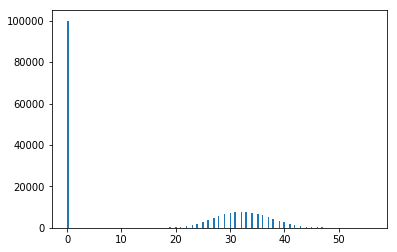

In [4]:
unique_count, test_real_index, _ = get_unique_counts(test)
unique_sum_per_row = np.sum(unique_count, axis=1)
plt.hist(unique_sum_per_row, bins=200); plt.show()

100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:03<00:00, 58.52it/s]


100000 0


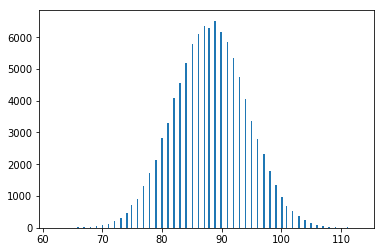

In [5]:
unique_count, _, _ = get_unique_counts(test.iloc[test_real_index])
unique_sum_per_row = np.sum(unique_count, axis=1)
plt.hist(unique_sum_per_row, bins=200); plt.show()

In [6]:
unique_samples = []
unique_count = np.zeros_like(train)
for feature in tqdm(range(train.shape[1])):
    _, index_, count_ = np.unique(train.values[:, feature], return_counts=True, return_index=True)
    unique_count[index_[count_ == 1], feature] += 1

# Samples which have unique values are real the others are fake
real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]
len(real_samples_indexes), len(synthetic_samples_indexes)

100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 30.10it/s]


(200000, 0)

100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 29.94it/s]


200000 0


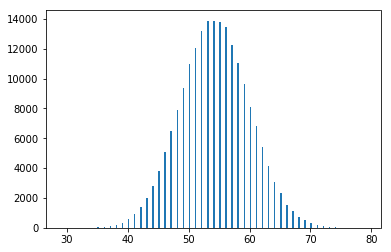

In [7]:
unique_count, real_index, _ = get_unique_counts(train)
unique_sum_per_row = np.sum(unique_count, axis=1)
plt.hist(unique_sum_per_row, bins=200); plt.show()

100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:13<00:00, 14.88it/s]


300000 100000


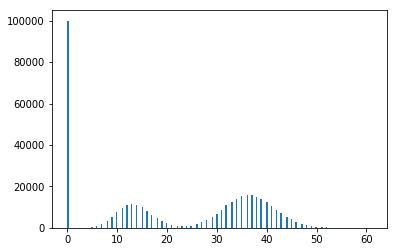

In [8]:
unique_count, real_index, _ = get_unique_counts(pd.concat([train, test], axis=0).reset_index(drop=True))
unique_sum_per_row = np.sum(unique_count, axis=1)
plt.hist(unique_sum_per_row, bins=200); plt.show()

In [9]:
'''
train['unique_sum_per_row'] = unique_sum_per_row[:train.shape[0]]
test['unique_sum_per_row'] = unique_sum_per_row[train.shape[0]:]
plt.hist(train['unique_sum_per_row'], bins=200); plt.show()
plt.hist(test['unique_sum_per_row'], bins=200); plt.show()
'''

"\ntrain['unique_sum_per_row'] = unique_sum_per_row[:train.shape[0]]\ntest['unique_sum_per_row'] = unique_sum_per_row[train.shape[0]:]\nplt.hist(train['unique_sum_per_row'], bins=200); plt.show()\nplt.hist(test['unique_sum_per_row'], bins=200); plt.show()\n"

100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:10<00:00, 20.19it/s]


300000 0


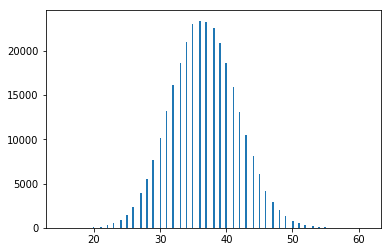

In [10]:
unique_count, real_index, _ = get_unique_counts(pd.concat([train, test.iloc[test_real_index]], axis=0).reset_index(drop=True))
unique_sum_per_row = np.sum(unique_count, axis=1)
plt.hist(unique_sum_per_row, bins=200); plt.show()

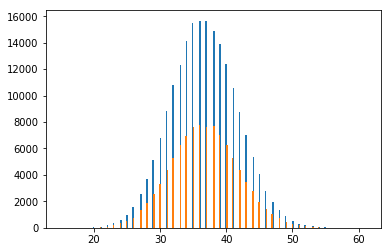

In [11]:
plt.hist(unique_sum_per_row[:train.shape[0]], bins=200);
plt.hist(unique_sum_per_row[train.shape[0]:], bins=200); plt.show()

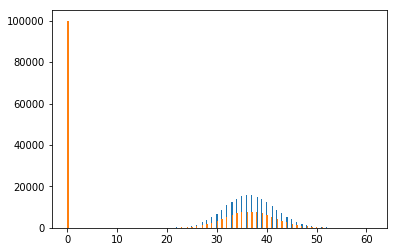

In [12]:
train['unique_sum_per_row'] = unique_sum_per_row[:train.shape[0]]
test['unique_sum_per_row'] = 0
test.loc[test_real_index, 'unique_sum_per_row'] = unique_sum_per_row[train.shape[0]:]

plt.hist(train['unique_sum_per_row'], bins=200);
plt.hist(test['unique_sum_per_row'], bins=200); plt.show()

In [15]:
train['target'] = target
train[['target', 'unique_sum_per_row']].corr('spearman')

,target,unique_sum_per_row
target,1.000000,0.029892
unique_sum_per_row,0.029892,1.000000


In [16]:
train[['unique_sum_per_row']].to_pickle('features/unique_sum_per_row_train.pkl')
test[['unique_sum_per_row']].to_pickle('features/unique_sum_per_row_test.pkl')